In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

In [2]:
restaurants = [
    {
        "Restaurant": "CASA DE MOOR - CHORLTON",
        "Location": "Chorlton, Manchester",
        "Cuisine": "Mediterranean",
        "Population_Area": 14138
    },
    {
        "Restaurant": "Railway Grill",
        "Location": "Manchester",
        "Cuisine": "Grill",
        "Population_Area": 15000
    }
]

restaurant_df = pd.DataFrame(restaurants)
restaurant_df

,Restaurant,Location,Cuisine,Population_Area
0,CASA DE MOOR - CHORLTON,"Chorlton, Manchester",Mediterranean,14138
1,Railway Grill,Manchester,Grill,15000


In [3]:
# Set seed for reproducibility
np.random.seed(42)

dates = pd.date_range(start="2025-01-01", end="2025-12-31")

data = []

for date in dates:
    for restaurant in ["CASA DE MOOR - CHORLTON", "Railway Grill"]:
        
        customers = np.random.randint(50, 200)
        avg_spend = np.random.uniform(12, 35)
        
        revenue = customers * avg_spend
        
        cost = revenue * np.random.uniform(0.45, 0.75)
        
        profit = revenue - cost
        
        data.append([
            date,
            restaurant,
            customers,
            round(avg_spend, 2),
            round(revenue, 2),
            round(cost, 2),
            round(profit, 2)
        ])

sales_df = pd.DataFrame(data, columns=[
    "Date",
    "Restaurant",
    "Customers",
    "Average_Spend",
    "Revenue",
    "Cost",
    "Profit"
])

sales_df.head()

,Date,Restaurant,Customers,Average_Spend,Revenue,Cost,Profit
0,2025-01-01,CASA DE MOOR - CHORLTON,152,30.32,4608.71,2327.54,2281.17
1,2025-01-01,Railway Grill,121,25.77,3118.07,1549.07,1568.99
2,2025-01-02,CASA DE MOOR - CHORLTON,124,22.56,2797.78,1539.09,1258.69
3,2025-01-02,Railway Grill,153,28.29,4327.71,1974.19,2353.51
4,2025-01-03,CASA DE MOOR - CHORLTON,51,28.61,1458.90,1067.28,391.62


In [4]:
sales_df["Profit_Margin"] = (sales_df["Profit"] / sales_df["Revenue"]) * 100

sales_df.head()

,Date,Restaurant,Customers,Average_Spend,Revenue,Cost,Profit,Profit_Margin
0,2025-01-01,CASA DE MOOR - CHORLTON,152,30.32,4608.71,2327.54,2281.17,49.496931
1,2025-01-01,Railway Grill,121,25.77,3118.07,1549.07,1568.99,50.319268
2,2025-01-02,CASA DE MOOR - CHORLTON,124,22.56,2797.78,1539.09,1258.69,44.988884
3,2025-01-02,Railway Grill,153,28.29,4327.71,1974.19,2353.51,54.382341
4,2025-01-03,CASA DE MOOR - CHORLTON,51,28.61,1458.90,1067.28,391.62,26.843512


In [5]:
demographics = []

for restaurant in ["CASA DE MOOR - CHORLTON", "Railway Grill"]:
    
    for age_group in ["18-24", "25-34", "35-44", "45-54", "55+"]:
        
        demographics.append([
            restaurant,
            age_group,
            np.random.randint(10, 35),  # %
            np.random.randint(40, 70),  # income in thousands
            np.random.choice(["Male", "Female"])
        ])

demographics_df = pd.DataFrame(demographics, columns=[
    "Restaurant",
    "Age_Group",
    "Customer_Percentage",
    "Avg_Income_K",
    "Gender"
])

demographics_df

,Restaurant,Age_Group,Customer_Percentage,Avg_Income_K,Gender
0,CASA DE MOOR - CHORLTON,18-24,13,44,Male
1,CASA DE MOOR - CHORLTON,25-34,17,62,Male
2,CASA DE MOOR - CHORLTON,35-44,24,54,Female
3,CASA DE MOOR - CHORLTON,45-54,23,47,Female
4,CASA DE MOOR - CHORLTON,55+,19,67,Female
5,Railway Grill,18-24,15,51,Female
6,Railway Grill,25-34,16,55,Male
7,Railway Grill,35-44,22,42,Male
8,Railway Grill,45-54,27,50,Female
9,Railway Grill,55+,15,40,Female


In [6]:
merged_df = sales_df.merge(
    restaurant_df,
    on="Restaurant",
    how="left"
)

merged_df.head()

,Date,Restaurant,Customers,Average_Spend,Revenue,Cost,Profit,Profit_Margin,Location,Cuisine,Population_Area
0,2025-01-01,CASA DE MOOR - CHORLTON,152,30.32,4608.71,2327.54,2281.17,49.496931,"Chorlton, Manchester",Mediterranean,14138
1,2025-01-01,Railway Grill,121,25.77,3118.07,1549.07,1568.99,50.319268,Manchester,Grill,15000
2,2025-01-02,CASA DE MOOR - CHORLTON,124,22.56,2797.78,1539.09,1258.69,44.988884,"Chorlton, Manchester",Mediterranean,14138
3,2025-01-02,Railway Grill,153,28.29,4327.71,1974.19,2353.51,54.382341,Manchester,Grill,15000
4,2025-01-03,CASA DE MOOR - CHORLTON,51,28.61,1458.90,1067.28,391.62,26.843512,"Chorlton, Manchester",Mediterranean,14138


In [7]:
merged_df.to_csv("restaurant_sales_data.csv", index=False)

merged_df.to_excel("restaurant_sales_data.xlsx", index=False)

demographics_df.to_csv("restaurant_demographics.csv", index=False)

print("Files saved successfully")

Files saved successfully


In [8]:
revenue_summary = merged_df.groupby("Restaurant")["Revenue"].sum()

revenue_summary

Restaurant
CASA DE MOOR - CHORLTON    1085532.66
Railway Grill              1045790.46
Name: Revenue, dtype: float64

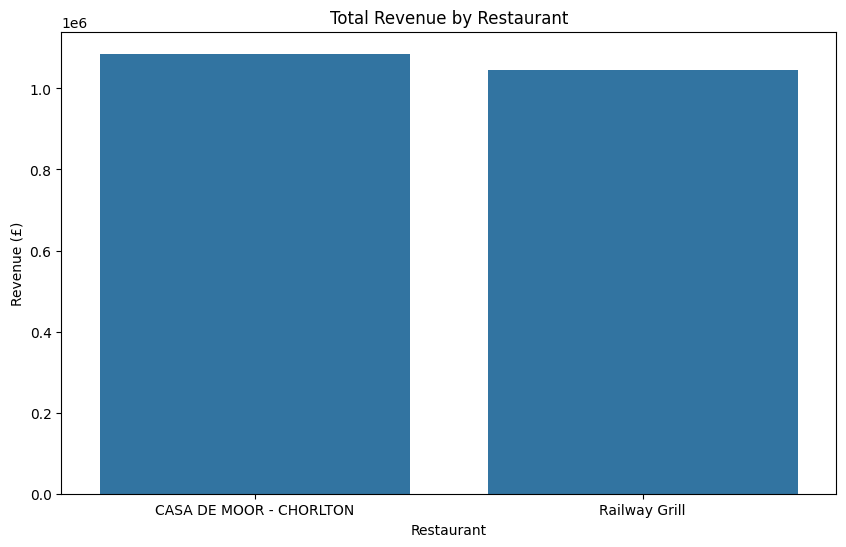

In [9]:
plt.figure(figsize=(10,6))

sns.barplot(
    x=revenue_summary.index,
    y=revenue_summary.values
)

plt.title("Total Revenue by Restaurant")
plt.ylabel("Revenue (£)")
plt.show()

In [10]:
avg_customers = merged_df.groupby("Restaurant")["Customers"].mean()

avg_customers

Restaurant
CASA DE MOOR - CHORLTON    125.169863
Railway Grill              123.106849
Name: Customers, dtype: float64

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             730 non-null    datetime64[ns]
 1   Restaurant       730 non-null    object        
 2   Customers        730 non-null    int64         
 3   Average_Spend    730 non-null    float64       
 4   Revenue          730 non-null    float64       
 5   Cost             730 non-null    float64       
 6   Profit           730 non-null    float64       
 7   Profit_Margin    730 non-null    float64       
 8   Location         730 non-null    object        
 9   Cuisine          730 non-null    object        
 10  Population_Area  730 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 62.9+ KB
